#Latihan *1*

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Data training
data = {
    "Temperatur": [10, 25, 15, 20, 18, 20, 22, 24],
    "Angin": [0, 0, 5, 3, 7, 10, 5, 6],
    "Label": ["Dingin", "Panas", "Dingin", "Panas", "Dingin", "Dingin", "Panas", "Panas"]
}

df1 = pd.DataFrame(data)

In [3]:
# Fitur dan label
X = df1[["Temperatur", "Angin"]]
y = df1["Label"]

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [5]:
# Mencari k terbaik
best_k = None
best_acc = 0

for k in range(1, len(X_train) + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc > best_acc:
        best_acc = acc
        best_k = k

print("K terbaik:", best_k)
print("Akurasi terbaik:", best_acc)

K terbaik: 1
Akurasi terbaik: 1.0


In [6]:
# Training final model dengan k terbaik
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [7]:
# Data test
test_data = [[16, 3]]
prediction = final_model.predict(test_data)

print("Persepsi Marry untuk (16°C, 3 km/jam):", prediction[0])

Persepsi Marry untuk (16°C, 3 km/jam): Dingin


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#Latihan 2

In [8]:
# Data
data2 = {
    "NIM": ["TI001","TI002","TI003","TI004","TI005",
            "TI006","TI007","TI008","TI009","TI010"],
    "Actual": ["Lulus","Lulus","Lulus","Lulus","Lulus",
               "Tidak Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus"],
    "Prediksi": ["Lulus","Lulus","Lulus","Tidak Lulus","Tidak Lulus",
                 "Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus"]
}

df2 = pd.DataFrame(data2)
df2

,NIM,Actual,Prediksi
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus
5,TI006,Tidak Lulus,Lulus
6,TI007,Tidak Lulus,Tidak Lulus
7,TI008,Tidak Lulus,Tidak Lulus
8,TI009,Tidak Lulus,Tidak Lulus
9,TI010,Tidak Lulus,Tidak Lulus


In [9]:
# Encode Label
mapping = {"Lulus": 1, "Tidak Lulus": 0}

df2["Actual_enc"] = df2["Actual"].map(mapping)
df2["Prediksi_enc"] = df2["Prediksi"].map(mapping)

df2

,NIM,Actual,Prediksi,Actual_enc,Prediksi_enc
0,TI001,Lulus,Lulus,1,1
1,TI002,Lulus,Lulus,1,1
2,TI003,Lulus,Lulus,1,1
3,TI004,Lulus,Tidak Lulus,1,0
4,TI005,Lulus,Tidak Lulus,1,0
5,TI006,Tidak Lulus,Lulus,0,1
6,TI007,Tidak Lulus,Tidak Lulus,0,0
7,TI008,Tidak Lulus,Tidak Lulus,0,0
8,TI009,Tidak Lulus,Tidak Lulus,0,0
9,TI010,Tidak Lulus,Tidak Lulus,0,0


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score

y_true = df2["Actual_enc"]
y_pred = df2["Prediksi_enc"]

cm = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Confusion Matrix:\n", cm)
print('\nPersentase Dari:')
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)

Confusion Matrix:
 [[4 1]
 [2 3]]

Persentase Dari:
Accuracy : 0.7
Precision: 0.75
Recall   : 0.6


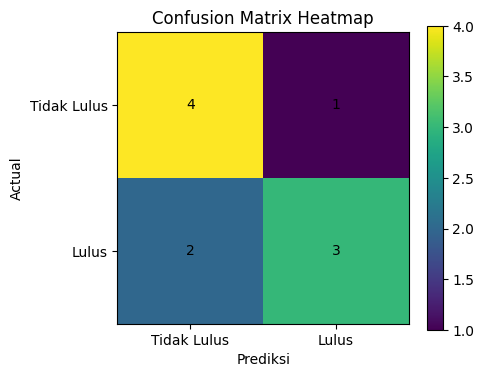

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Prediksi")
plt.ylabel("Actual")
plt.xticks([0,1], ["Tidak Lulus", "Lulus"])
plt.yticks([0,1], ["Tidak Lulus", "Lulus"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar()
plt.tight_layout()

plt.show()

#Latihan 3

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

https://docs.google.com/spreadsheets/d/1iG5HxB_odohh6Wit992g9MPvL5xapr64/edit?usp=sharing&ouid=104649873490387198451&rtpof=true&sd=true

In [15]:
df3 = pd.read_excel("https://docs.google.com/spreadsheets/d/1iG5HxB_odohh6Wit992g9MPvL5xapr64/export?format=xlsx")
df3.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [16]:
categorical_cols = ["Cloud Cover", "Season", "Location", "Weather Type"]

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    le_dict[col] = le

In [17]:
X = df3.drop("Weather Type", axis=1)
y = df3["Weather Type"]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [20]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

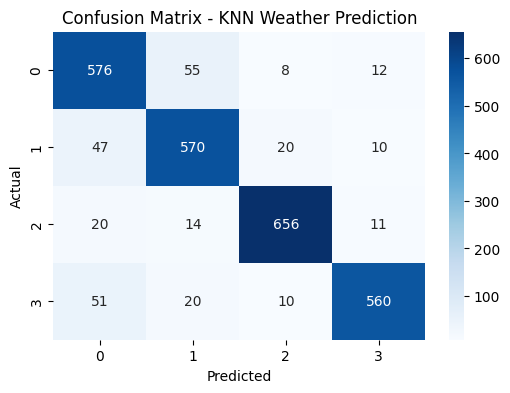

In [21]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN Weather Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       651
           1       0.86      0.88      0.87       647
           2       0.95      0.94      0.94       701
           3       0.94      0.87      0.91       641

    accuracy                           0.89      2640
   macro avg       0.90      0.89      0.89      2640
weighted avg       0.90      0.89      0.90      2640

